In [1]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('https://www.quandl.com/api/v3/datasets/BITFINEX/BTCUSD.csv?api_key=DY13zP9xEZzumGkWckas')

df.head(5)

,Date,High,Low,Average,Last,Buy,Sell,Volume,Volume (Currency)
0,2017-06-05,2626.201,2458.400,2542.3005,2623.999,2623.999,2621.002,1.460556e+07,5731.62652
1,2017-06-04,2505.000,2409.991,2457.4955,2467.120,2468.698,2468.175,1.229963e+07,4970.49437
2,2017-06-03,2498.002,2357.000,2427.5010,2479.892,2479.896,2479.892,1.376082e+07,5661.23893
3,2017-06-02,2388.115,2300.000,2344.0575,2389.000,2389.000,2388.009,1.027176e+07,4380.86370
4,2017-06-01,2382.523,2204.106,2293.3145,2303.700,2303.650,2303.000,2.171795e+07,9356.08810


In [3]:
df['Date'] = pd.DatetimeIndex(df['Date'])
df.dtypes

Date                 datetime64[ns]
High                        float64
Low                         float64
Average                     float64
Last                        float64
Buy                         float64
Sell                        float64
Volume                      float64
Volume (Currency)           float64
dtype: object

In [4]:
df2 = df.rename(columns={'Date':'ds', 'Volume': 'y'})
df2.head()

,ds,High,Low,Average,Last,Buy,Sell,y,Volume (Currency)
0,2017-06-05,2626.201,2458.400,2542.3005,2623.999,2623.999,2621.002,1.460556e+07,5731.62652
1,2017-06-04,2505.000,2409.991,2457.4955,2467.120,2468.698,2468.175,1.229963e+07,4970.49437
2,2017-06-03,2498.002,2357.000,2427.5010,2479.892,2479.896,2479.892,1.376082e+07,5661.23893
3,2017-06-02,2388.115,2300.000,2344.0575,2389.000,2389.000,2388.009,1.027176e+07,4380.86370
4,2017-06-01,2382.523,2204.106,2293.3145,2303.700,2303.650,2303.000,2.171795e+07,9356.08810


In [5]:
df2 = df2[['ds','y']]

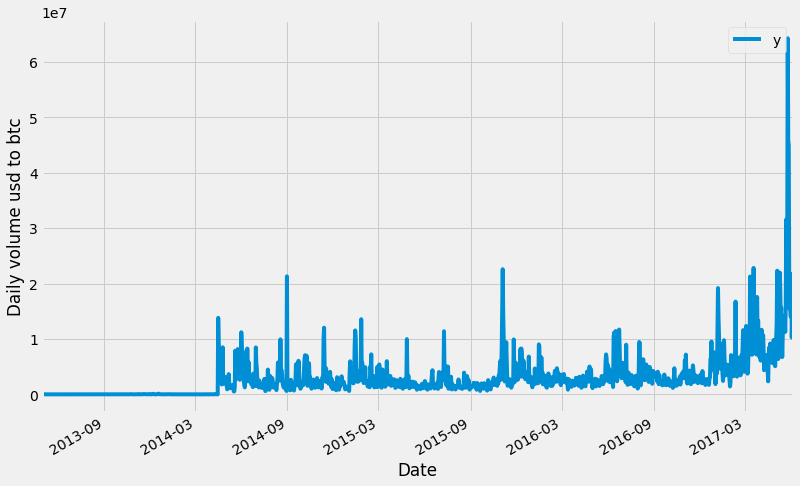

In [6]:
ax = df2.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Daily volume usd to btc')
ax.set_xlabel('Date')

plt.show()

In [7]:
my_model = Prophet(interval_width=0.95)
my_model.fit(df2)

In [8]:
future_dates = my_model.make_future_dataframe(periods=365, freq='D')
future_dates.tail()

,ds
1833,2018-06-01
1834,2018-06-02
1835,2018-06-03
1836,2018-06-04
1837,2018-06-05


In [9]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1833,2018-06-01,2.879396e+07,2.127860e+07,3.624205e+07
1834,2018-06-02,2.822614e+07,2.054066e+07,3.555778e+07
1835,2018-06-03,2.777883e+07,2.015278e+07,3.549119e+07
1836,2018-06-04,2.826259e+07,1.989477e+07,3.576907e+07
1837,2018-06-05,2.828499e+07,2.018069e+07,3.575856e+07


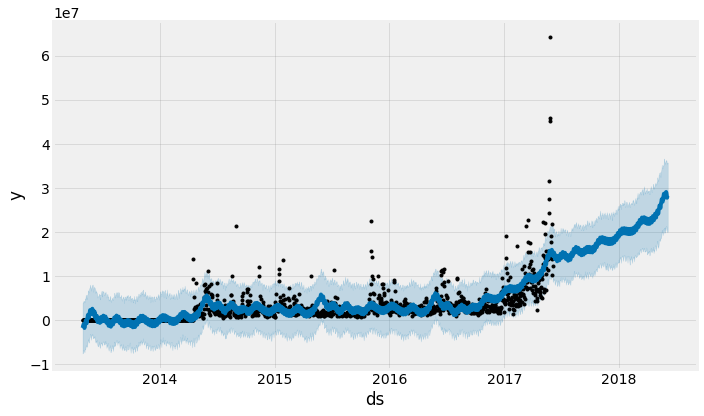

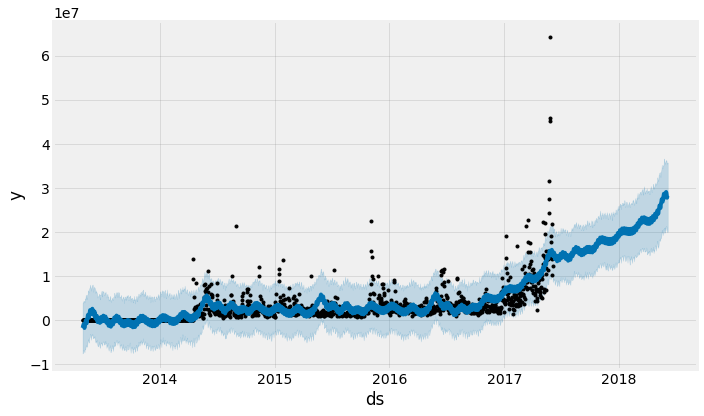

In [10]:
my_model.plot(forecast,
              uncertainty=True)

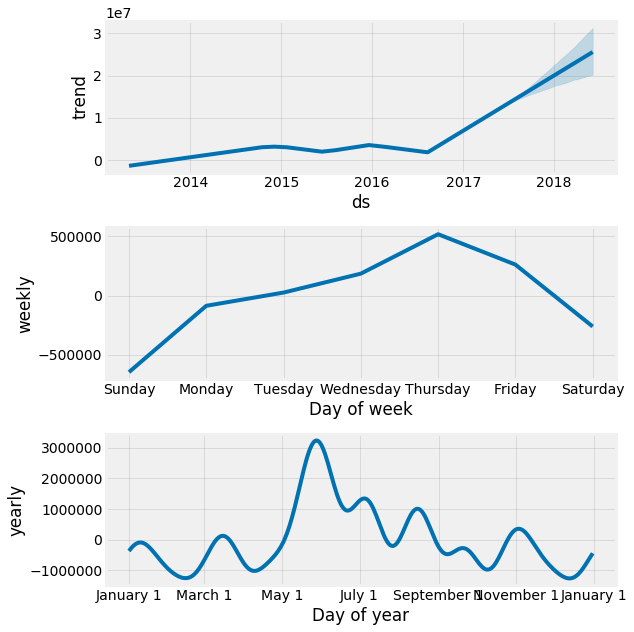

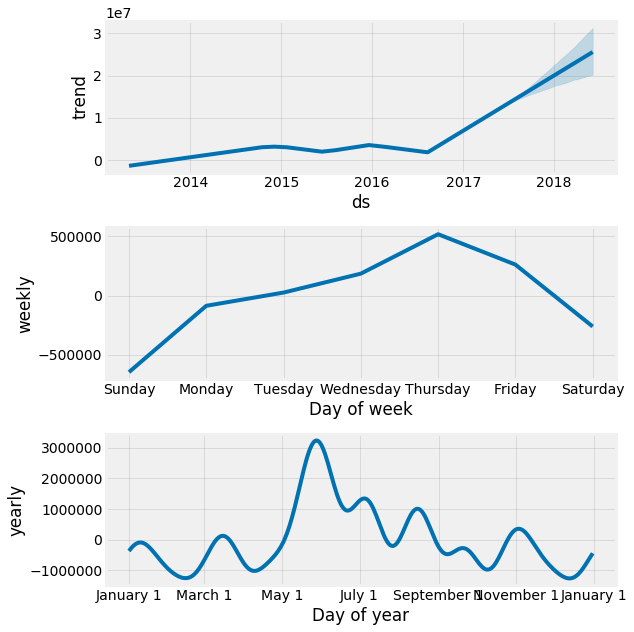

In [11]:
my_model.plot_components(forecast)